In [105]:
%matplotlib notebook

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [185]:
crimedata = r"\Users\Menard\Desktop\Project_1\project_folder\MenardC\Resources\crime-data-from-2010-to-present.csv"
crimecsv=pd.read_csv(crimedata)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,102005556,2010-01-25T00:00:00,2010-01-22T00:00:00,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"{'latitude': '34.0454', 'needs_recoding': Fals..."
1,101822289,2010-11-11T00:00:00,2010-11-10T00:00:00,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"{'latitude': '33.9572', 'needs_recoding': Fals..."
2,101105609,2010-01-28T00:00:00,2010-01-27T00:00:00,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"{'latitude': '34.1211', 'needs_recoding': Fals..."
3,101620051,2010-11-11T00:00:00,2010-11-07T00:00:00,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"{'latitude': '34.241', 'needs_recoding': False..."
4,101910498,2010-04-07T00:00:00,2010-04-07T00:00:00,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"{'latitude': '34.3147', 'needs_recoding': Fals..."


In [108]:
crimepa=crimecsv['Crime Code Description'].value_counts()
crimearea = crimecsv.groupby(['Area Name','Crime Code Description'])['Crime Code Description'].count().reset_index(name='Count')
crimearea

,Area Name,Crime Code Description,Count
0,77th Street,ARSON,332
1,77th Street,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,135
2,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",11127
3,77th Street,ATTEMPTED ROBBERY,1246
4,77th Street,BATTERY - SIMPLE ASSAULT,14497
...,...,...,...
2573,Wilshire,VEHICLE - STOLEN,4612
2574,Wilshire,VIOLATION OF COURT ORDER,615
2575,Wilshire,VIOLATION OF RESTRAINING ORDER,582
2576,Wilshire,VIOLATION OF TEMPORARY RESTRAINING ORDER,47


## Determining The Total Number Of Crimes That Occured Per Area.

In [131]:
# Getting the total number of crimes that occured per area.
total_crimes_per_area = crimearea.groupby(['Area Name'])['Count'].sum().reset_index(name='Total Count')
# Sorting values from highhest count to lowest
total_crimes_per_area.sort_values(by='Total Count', ascending=False, inplace=True)
# Creating a pair to register the total amount of crimes within the dataset
total_crimes = total_crimes_per_area['Total Count'].sum()
# Getting the percentage of crimes that occured per area.
total_crimes_per_area['Percentage'] = total_crimes_per_area['Total Count'] / total_crimes * 100
print(total_crimes_per_area)

      Area Name  Total Count  Percentage
0   77th Street       137513    6.898903
15    Southwest       128111    6.427213
8   N Hollywood       107707    5.403563
12      Pacific       105655    5.300616
14    Southeast       105104    5.272973
7       Mission        98395    4.936388
10    Northeast        94912    4.761649
17     Van Nuys        94358    4.733855
9        Newton        94123    4.722066
6     Hollywood        92742    4.652782
16      Topanga        92262    4.628701
2    Devonshire        91347    4.582796
1       Central        90489    4.539751
11      Olympic        89634    4.496857
4        Harbor        86972    4.363307
19  West Valley        84521    4.240342
13      Rampart        84241    4.226295
18      West LA        83736    4.200959
20     Wilshire        82575    4.142713
3      Foothill        75348    3.780141
5    Hollenbeck        73514    3.688131


<IPython.core.display.Javascript object>


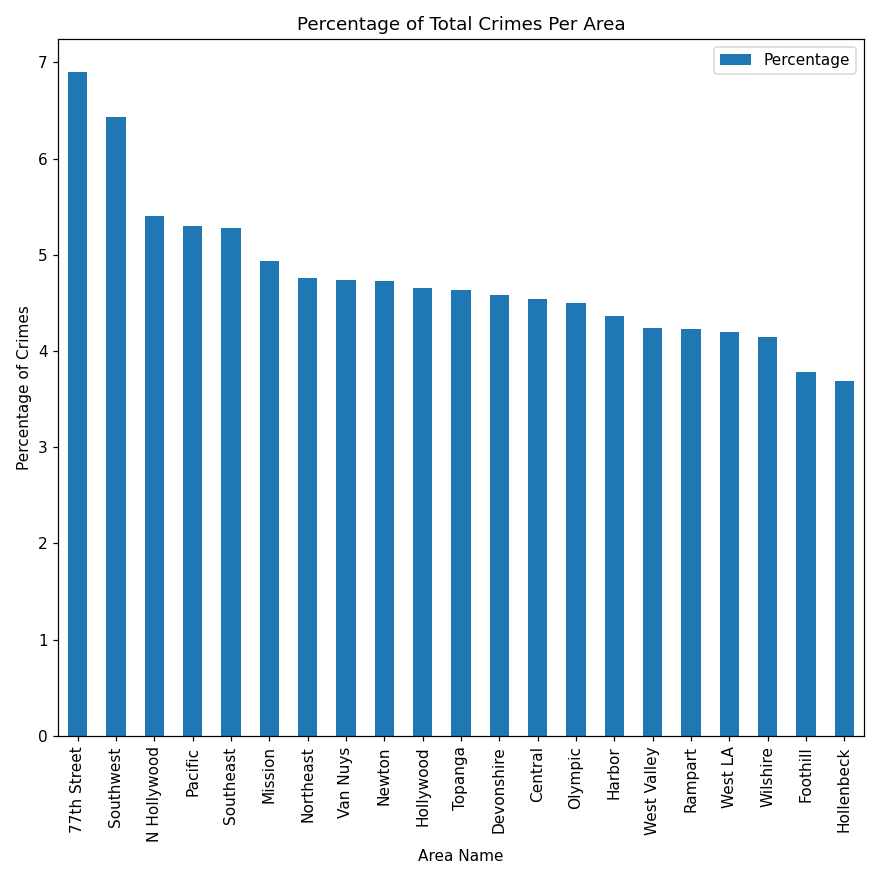

In [124]:
# Plotting the percentage of crimes per area to get a better visual.
total_crimes_per_area.plot(x='Area Name', y='Percentage', kind='bar', figsize=(8, 8))
plt.xlabel('Area')
plt.ylabel('Percentage of Crimes')
plt.title('Percentage of Total Crimes Per Area')
plt.tight_layout()
plt.show()

## Getting The Overall Highest Reported Crime

In [134]:
# To get the count along with the crime description we will need to group the two columns we want
# to visually see when printed.
crime_counts = crimecsv.groupby('Crime Code Description')['Crime Code Description'].count()
# Getting only the 5 highest crimes reported
top_5_crimes = crime_counts.nlargest(5)
top_5_crimes

Crime Code Description
BATTERY - SIMPLE ASSAULT              180434
BURGLARY FROM VEHICLE                 153451
VEHICLE - STOLEN                      151622
THEFT PLAIN - PETTY ($950 & UNDER)    141489
BURGLARY                              140926
Name: Crime Code Description, dtype: int64

In [202]:
# Converting the results to percentages for graphing.
top_5_crime_percentages = top_5_crimes / total_crimes * 100
print(top_5_crime_percentages)

Crime Code Description
BATTERY - SIMPLE ASSAULT              9.052210
BURGLARY FROM VEHICLE                 7.698498
VEHICLE - STOLEN                      7.606739
THEFT PLAIN - PETTY ($950 & UNDER)    7.098375
BURGLARY                              7.070130
Name: Crime Code Description, dtype: float64


<IPython.core.display.Javascript object>


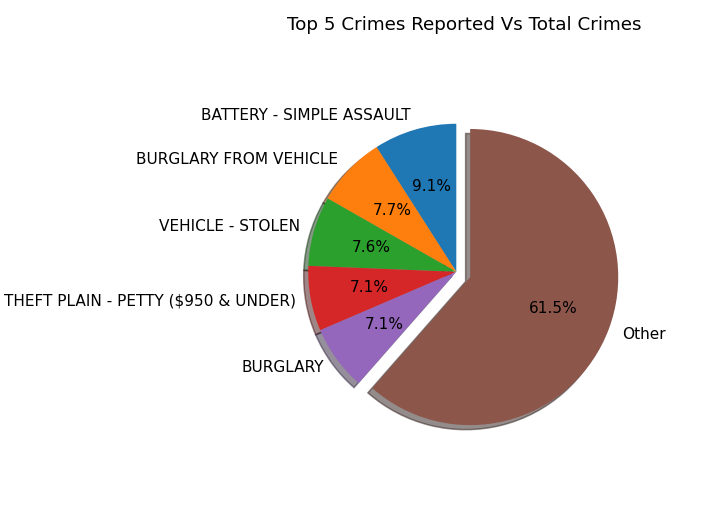

In [204]:
# PLotting the top 5 commited crimes and comparing it to the total number of crimes commited to see
# how big of an impact the crimes are compared to the rest of the crimes
crime_counts = crimecsv.groupby(['Crime Code Description'])['Crime Code Description'].count().reset_index(name='Count')
crime_counts.sort_values(by='Count', ascending=False, inplace=True)

top_5_crimes = crime_counts.head(5)

other_crimes = crime_counts[5:]
other_crimes_count = other_crimes['Count'].sum()
other_crimes = pd.DataFrame({'Crime Code Description': ['Other'], 'Count': [other_crimes_count]})

top_5_crimes = pd.concat([top_5_crimes, other_crimes])

labels = top_5_crimes['Crime Code Description']
sizes = top_5_crimes['Count']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, explode=[0, 0, 0, 0, 0, 0.1])
ax1.axis('equal')
plt.title('Top 5 Crimes Reported Vs Total Crimes')
plt.tight_layout()
plt.show()

## Comparing The Top 3 Highest Rated Crime Neighborhood In Battery - Simple Assault

In [137]:
# Getting the count of Battery - Simple Assault per area.
crimecsv_battery = crimecsv[crimecsv['Crime Code Description'] == 'BATTERY - SIMPLE ASSAULT']
battery_count_per_area = crimecsv_battery.groupby(['Area Name'])['Area Name'].count().reset_index(name='Count')
# Sorting the results
battery_count_per_area.sort_values(by='Count', ascending=False, inplace=True)
print(battery_count_per_area)

      Area Name  Count
0   77th Street  14497
1       Central  13714
15    Southwest  13460
14    Southeast  10946
11      Olympic  10397
6     Hollywood   9945
9        Newton   9452
13      Rampart   8992
7       Mission   8525
8   N Hollywood   8053
12      Pacific   7781
5    Hollenbeck   7637
17     Van Nuys   7010
10    Northeast   6960
20     Wilshire   6696
4        Harbor   6582
16      Topanga   6492
18      West LA   6237
2    Devonshire   6083
19  West Valley   5676
3      Foothill   5299


<IPython.core.display.Javascript object>


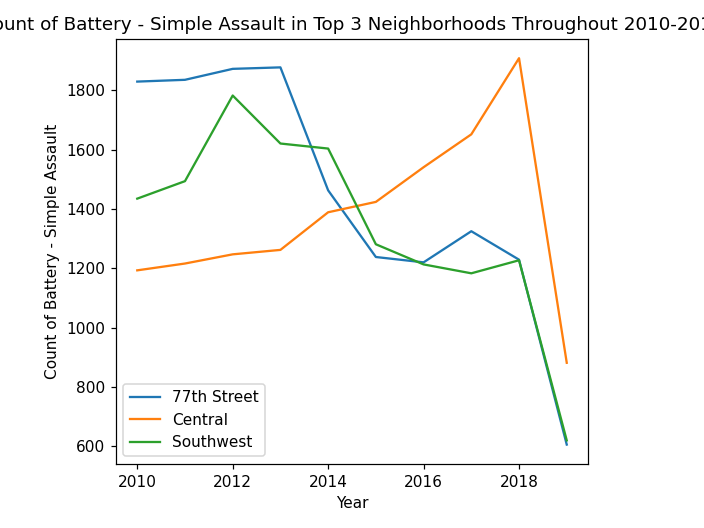

77th Street: Year
2010    1830
2011    1836
2012    1873
2013    1878
2014    1463
2015    1238
2016    1220
2017    1325
2018    1229
2019     605
Name: Year, dtype: int64
Central: Year
2010    1193
2011    1216
2012    1247
2013    1262
2014    1389
2015    1424
2016    1541
2017    1652
2018    1909
2019     881
Name: Year, dtype: int64
Southwest: Year
2010    1435
2011    1494
2012    1783
2013    1621
2014    1604
2015    1281
2016    1213
2017    1183
2018    1227
2019     619
Name: Year, dtype: int64


In [172]:
# Filtering the data to include only 77th street, Central and Southwest neighborhoods
crimecsv_selected_areas = crimecsv[crimecsv['Area Name'].isin(['77th Street', 'Central', 'Southwest'])]

# Filter the data to include only battery - simple assault
crimecsv_selected_areas = crimecsv_selected_areas[crimecsv_selected_areas['Crime Code Description'] == 'BATTERY - SIMPLE ASSAULT']

# Group the data by year and area name
crime_count_per_year_per_area = crimecsv_selected_areas.groupby(['Area Name', crimecsv_selected_areas['Date Occurred'].dt.year])['Date Occurred'].count().reset_index(name='Count')

# Plot the line chart
for area in ['77th Street', 'Central', 'Southwest']:
    area_data = crime_count_per_year_per_area[crime_count_per_year_per_area['Area Name'] == area]
    plt.plot(area_data[area_data['Area Name'] == area]['Date Occurred'], area_data[area_data['Area Name'] == area]['Count'], label=area)

plt.xlabel('Year')
plt.ylabel('Count of Battery - Simple Assault')
plt.title('Count of Battery - Simple Assault in Top 3 Neighborhoods Throughout 2010-2018')
plt.legend(loc='best')
plt.tight_layout()


crimecsv['Date Occurred'] = pd.to_datetime(crimecsv['Date Occurred'])
crimecsv['Year'] = crimecsv['Date Occurred'].dt.year

areas = ['77th Street', 'Central', 'Southwest']
for area in areas:
    crimes_area = crimecsv[crimecsv['Area Name'] == area]
    battery_crimes = crimes_area[crimes_area['Crime Code Description'] == 'BATTERY - SIMPLE ASSAULT']
    battery_crimes_per_year = battery_crimes.groupby(['Year'])['Year'].count()
    print(f"{area}: {battery_crimes_per_year}")


plt.show()

## Comparing Burlary from Vehicle and Burglary

In [205]:
# Creating dataframes for the two crime descriptions to compare
burglary_from_vehicle = crimecsv[crimecsv['Crime Code Description'] == 'BURGLARY FROM VEHICLE']
burglary = crimecsv[crimecsv['Crime Code Description'] == 'BURGLARY']
# Getting the count for the two descriptions
burglary_from_vehicle_per_area = burglary_from_vehicle.groupby(['Area Name'])['Area Name'].count().reset_index(name='Count')
burglary_per_area = burglary.groupby(['Area Name'])['Area Name'].count().reset_index(name='Count')
# Grouping the count with the area names
burglary_from_vehicle_count_per_area = burglary_from_vehicle[burglary_from_vehicle['Crime Code Description'] == 'BURGLARY FROM VEHICLE'].groupby(['Area Name'])['Area Name'].count().reset_index(name='Count')
# Getting sum to calculate percentage of burglary from vehicle per area.
total_burglaries_from_vehicle = burglary_from_vehicle_count_per_area['Count'].sum()
burglary_from_vehicle_count_per_area['Percentage'] = burglary_from_vehicle_count_per_area['Count'] / total_burglaries_from_vehicle * 100
# Sorting
burglary_from_vehicle_count_per_area.sort_values(by='Percentage', ascending=False, inplace=True)

print(burglary_from_vehicle_count_per_area)

      Area Name  Count  Percentage
8   N Hollywood  11603    7.561371
6     Hollywood   9211    6.002568
12      Pacific   8925    5.816189
17     Van Nuys   8429    5.492959
18      West LA   8417    5.485139
10    Northeast   8289    5.401724
2    Devonshire   8227    5.361321
11      Olympic   7746    5.047865
15    Southwest   7687    5.009417
20     Wilshire   7591    4.946856
0   77th Street   7199    4.691400
7       Mission   7113    4.635356
1       Central   7065    4.604076
19  West Valley   6873    4.478954
9        Newton   6810    4.437899
16      Topanga   6386    4.161589
13      Rampart   6208    4.045591
4        Harbor   5442    3.546409
14    Southeast   4962    3.233606
3      Foothill   4858    3.165831
5    Hollenbeck   4410    2.873882


In [174]:
# Grouping the crime description with counting the number of times the area name occured.
burglary_count_per_area = crimecsv[crimecsv['Crime Code Description'] == 'BURGLARY'].groupby(['Area Name'])['Area Name'].count().reset_index(name='Count')
# Getting sum of total count for percentage
total_burglaries = burglary_count_per_area['Count'].sum()
burglary_count_per_area['Percentage'] = burglary_count_per_area['Count'] / total_burglaries * 100
# Sorting
burglary_count_per_area.sort_values(by='Percentage', ascending=False, inplace=True)

print(burglary_count_per_area)

      Area Name  Count  Percentage
12      Pacific   9700    6.883045
2    Devonshire   9269    6.577211
0   77th Street   9254    6.566567
18      West LA   8953    6.352980
19  West Valley   8570    6.081206
15    Southwest   8117    5.759760
16      Topanga   8106    5.751955
20     Wilshire   7968    5.654031
14    Southeast   7799    5.534110
8   N Hollywood   7519    5.335424
10    Northeast   6844    4.856449
4        Harbor   6835    4.850063
17     Van Nuys   6274    4.451982
7       Mission   6137    4.354768
3      Foothill   5474    3.884308
11      Olympic   5262    3.733875
9        Newton   4713    3.344308
6     Hollywood   4361    3.094532
13      Rampart   3697    2.623363
5    Hollenbeck   3485    2.472929
1       Central   2589    1.837134


<IPython.core.display.Javascript object>


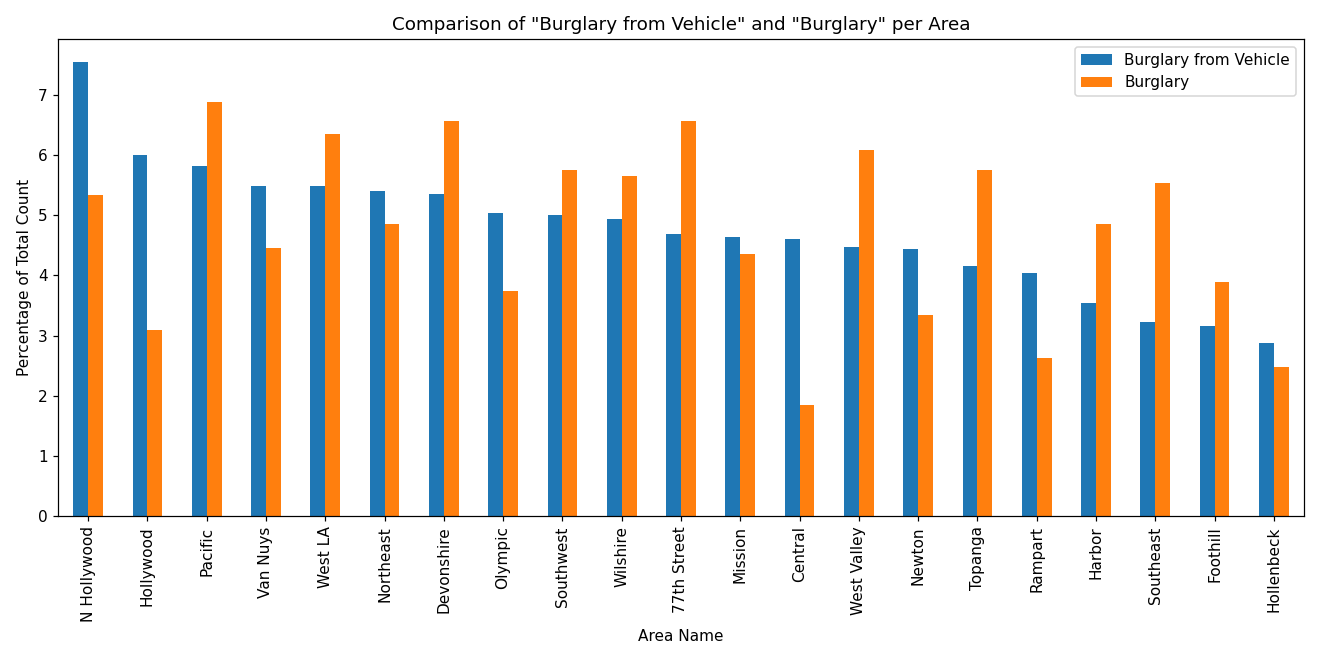

In [179]:
# Get the data for 'BURGLARY FROM VEHICLE'
burglary_from_vehicle = crimecsv[crimecsv['Crime Code Description'] == 'BURGLARY FROM VEHICLE']
burglary_from_vehicle_count_per_area = burglary_from_vehicle.groupby(['Area Name'])['Area Name'].count().reset_index(name='Count')
total_burglaries_from_vehicle = burglary_from_vehicle_count_per_area['Count'].sum()
burglary_from_vehicle_count_per_area['Percentage'] = burglary_from_vehicle_count_per_area['Count'] / total_burglaries_from_vehicle * 100
burglary_from_vehicle_count_per_area.sort_values(by='Percentage', ascending=False, inplace=True)

# Get the data for 'BURGLARY'
burglary = crimecsv[crimecsv['Crime Code Description'] == 'BURGLARY']
burglary_count_per_area = burglary.groupby(['Area Name'])['Area Name'].count().reset_index(name='Count')
total_burglaries = burglary_count_per_area['Count'].sum()
burglary_count_per_area['Percentage'] = burglary_count_per_area['Count'] / total_burglaries * 100
burglary_count_per_area.sort_values(by='Percentage', ascending=False, inplace=True)

# Merge the data for both crimes
compared_crimes = burglary_from_vehicle_count_per_area.merge(burglary_count_per_area, on='Area Name', suffixes=('_burglary_from_vehicle', '_burglary'))

# Plot the data
compared_crimes.plot(x='Area Name', y=['Percentage_burglary_from_vehicle', 'Percentage_burglary'], kind='bar', figsize=(12, 6))
plt.title('Comparison of "Burglary from Vehicle" and "Burglary" per Area')
plt.xlabel('Area Name')
plt.ylabel('Percentage of Total Count')
plt.legend(['Burglary from Vehicle', 'Burglary'])
plt.tight_layout()
plt.show()


## Comparing Burglaries From Vehicle and Burglaries Between 10/31 - 12/31

In [210]:
# Converting the 'Date Occurred' column to datetime format
crimecsv['Date Occurred'] = pd.to_datetime(crimecsv['Date Occurred'])
# Extracting the day and month information from the 'Date Occurred' column
crimecsv['Day'] = crimecsv['Date Occurred'].dt.day
crimecsv['Month'] = crimecsv['Date Occurred'].dt.month
# Creating a dataframe containing only the crimes that occurred between October 31st to December 31st
oct_31_to_dec_31_crimes = crimecsv[(crimecsv['Month'] >= 10) & (crimecsv['Month'] <= 12) & ((crimecsv['Day'] >= 31) | (crimecsv['Month'] > 10))]
# Creating a dataframe containing only the 'BURGLARY FROM VEHICLE' crimes that occurred between October 31st to December 31st
burglary_from_vehicle_crimes = oct_31_to_dec_31_crimes[oct_31_to_dec_31_crimes['Crime Code Description'] == 'BURGLARY FROM VEHICLE']
# Counting the number of 'BURGLARY FROM VEHICLE' crimes that occurred each year between October 31st to December 31st
burglary_from_vehicle_count_per_year = burglary_from_vehicle_crimes.groupby(burglary_from_vehicle_crimes['Date Occurred'].dt.year)['Date Occurred'].count()


print(burglary_from_vehicle_count_per_year)

Date Occurred
2010    2939
2011    2906
2012    2659
2013    2515
2014    2329
2015    2831
2016    3038
2017    3170
2018    3308
Name: Date Occurred, dtype: int64


In [187]:
# Same concept as above but looking for Burglary instead.
crimecsv['Date Occurred'] = pd.to_datetime(crimecsv['Date Occurred'])
crimecsv['Day'] = crimecsv['Date Occurred'].dt.day
crimecsv['Month'] = crimecsv['Date Occurred'].dt.month
burglary_crimes = crimecsv[(crimecsv['Month'] >= 10) & (crimecsv['Month'] <= 12) & (crimecsv['Day'] >= 31)]
burglary = burglary_crimes[burglary_crimes['Crime Code Description'] == 'BURGLARY']
burglary_count_per_year = burglary.groupby(burglary['Date Occurred'].dt.year)['Date Occurred'].count()

print(burglary_count_per_year)

Date Occurred
2010     98
2011     85
2012     98
2013     92
2014    120
2015     93
2016     90
2017     95
2018     70
Name: Date Occurred, dtype: int64


<IPython.core.display.Javascript object>


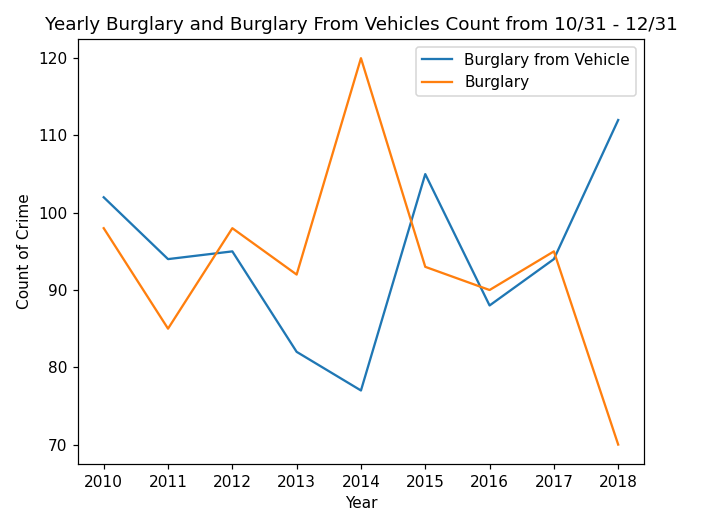

In [216]:
# Plot
plt.plot(burglary_from_vehicle_count_per_year.index, burglary_from_vehicle_count_per_year.values, label='Burglary from Vehicle')
plt.plot(burglary_count_per_year.index, burglary_count_per_year.values, label='Burglary')
plt.xlabel('Year')
plt.ylabel('Count of Crime')
plt.title('Yearly Burglary and Burglary From Vehicles Count from 10/31 - 12/31')
plt.legend(loc='best')
plt.tight_layout()
plt.show()